<a href="https://colab.research.google.com/github/aryan-cs/five-rings-interview/blob/master/five_rings_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

The Five Rings Interview question gives us 3 irregular dice, each with their own unique markings. It then sets up the hypothetical scenario of a game, where two players each choose one of the dice and must roll a higher number than the other. The question is, should you be the first to pick a dice, or the second? Which dice should you pick?

The markings for the 3 dice are as pictured:

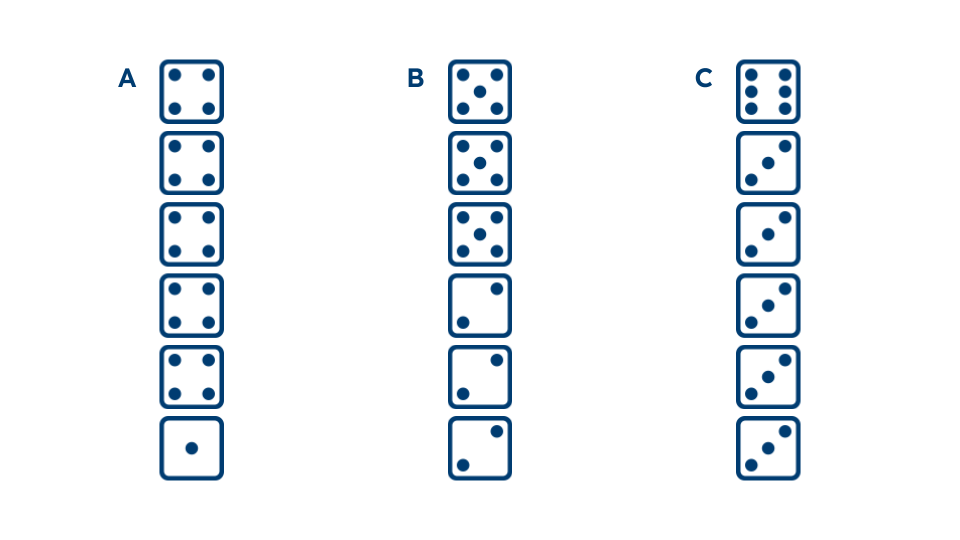

# Breakdown

The first part of the question asks if we should be the first person or the second person to pick the dice. This question is synonymous to the following: Is this game transitive, or non-transitive?

A transitive game is a game where, if A beats B, and B beats C, A beats C. An example of such a game could be War, where a hand of two Aces can beat a hand of two Jacks, which can beat a hand of two 10s, so the hand of two Aces can beat the hand of two 10s.

A, A > J, J > 10, 10

A non-transitive, or intransitive, game is a type of zero sum game in which the transitive property is not applicable (A beats B, B beats C, A does NOT beat C). An example of such a game is Rock, Paper, Scissors.

So first, we must determine the nature of the 3-dice game. Is it transitive or not?

To determine if one dice is better than the other two dice, we can calculate the probability of winning given two dice, say dice A and B.

We can match each winning option A to the face of the other die that option would win against. Here, we can see all the sides with 4 dots beat all the sides with 2 dots.

The chance of rolling a winning 4 with dice A is 5/6, as there are 5 possible sides with 4 dots and 6 sides total. Similarly, the chance of rolling a losing 4 with dice B is 3/6, as there are only 3 faces with less than 4 dots (3 faces with 2 dots).

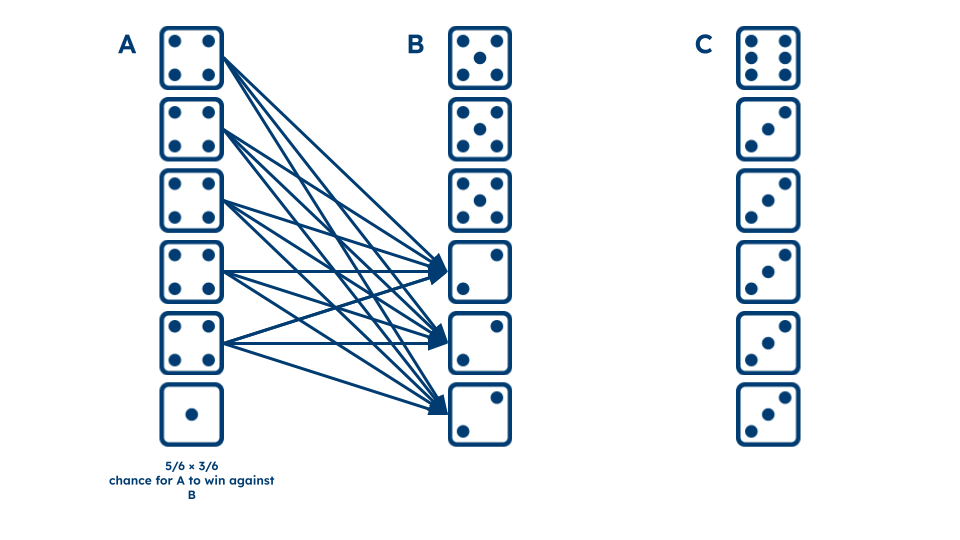

For dice A to win out over dice B, A must result in a 4 **and** B must result in a 2. To express this mathematically, we say:

A must result in a 4 (**5/6**) and (**multiplied by**) B must result in a 2 (**3/6**).

Which means there is a 5/6 × 3/6 = 5/12 = **41.67% of A beating B**.

Similarly, we can compare the odds of B beating A.
Before we continue, try to think what the probability should be without any further calculations.

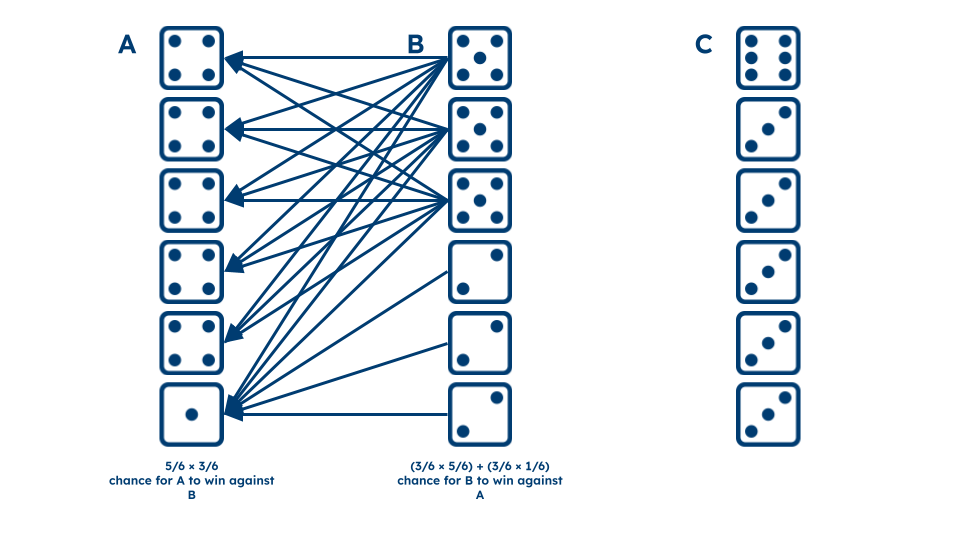

For dice B to win out over dice A, B must result in a 5 and A can be any of its results **or** B must result in a 2 and A must result in a 1. Mathematically, this looks like:

(3/6 × 5/6) + (3/6 × 1/6)

Which means there is a (3/6 × 5/6) + (3/6 × 1/6) = **58.33% of B beating A**.

What do you notice in these two probabilities? If you said they add up to 100%, you'd be correct! Since there is not possible way to tie, a game can only result in a win or a loss for a player.

We can approach the rest of the game analytically using our prior approach.

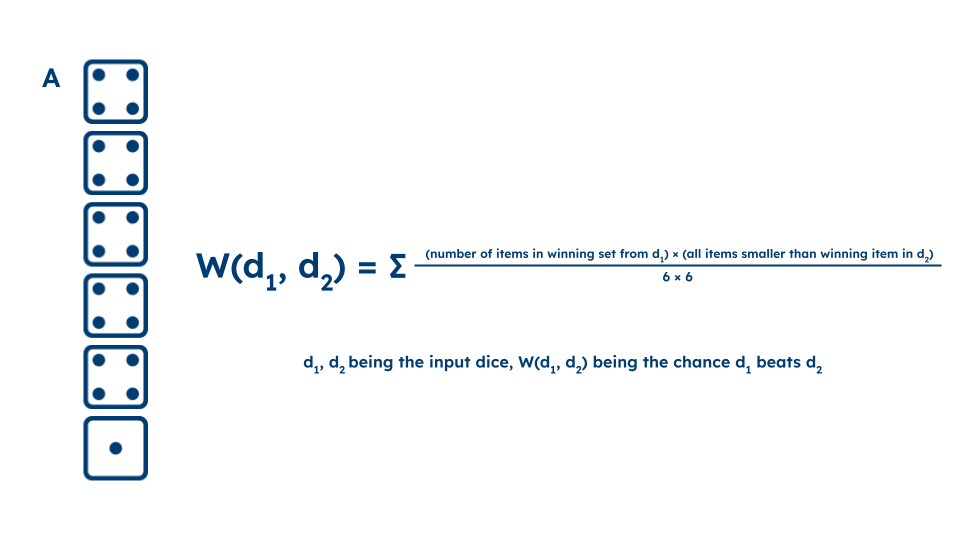

Let's analyze all our options:

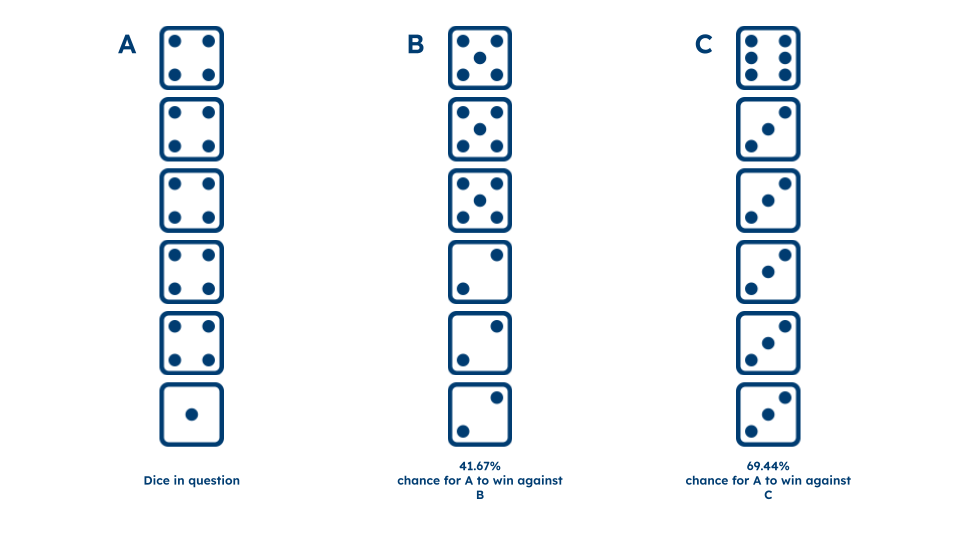
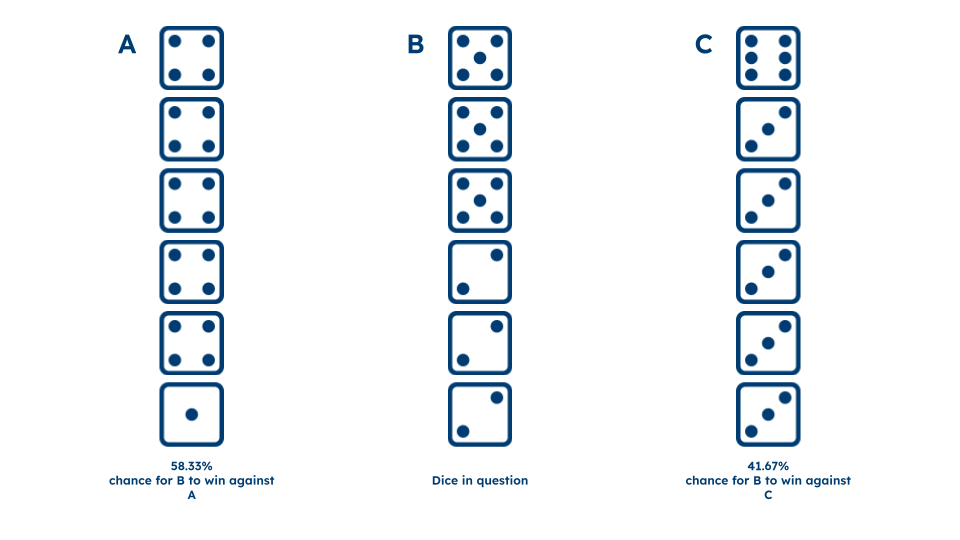
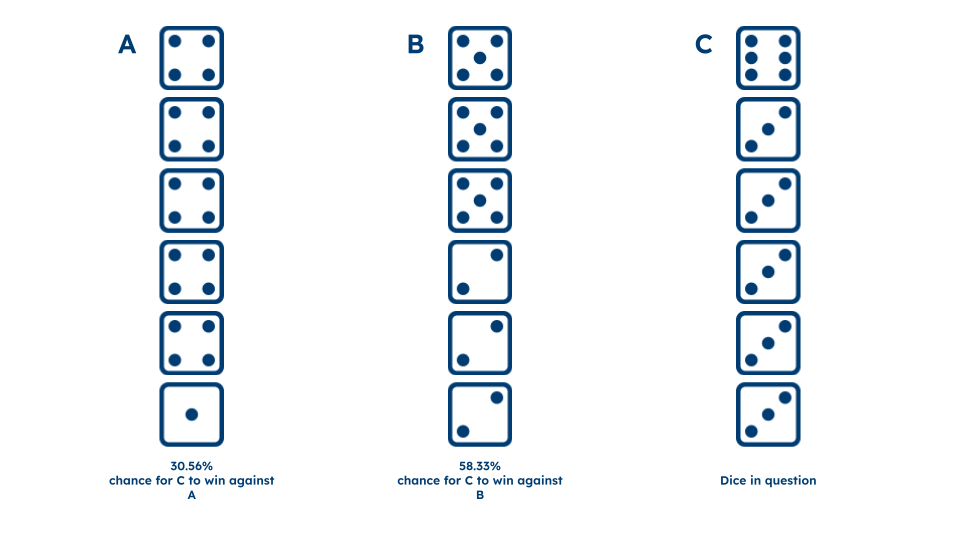

What do you notice?

This game is non-transitive! Just like rock, paper, scissors, every die has a die which is statistically more advantageous to choose.

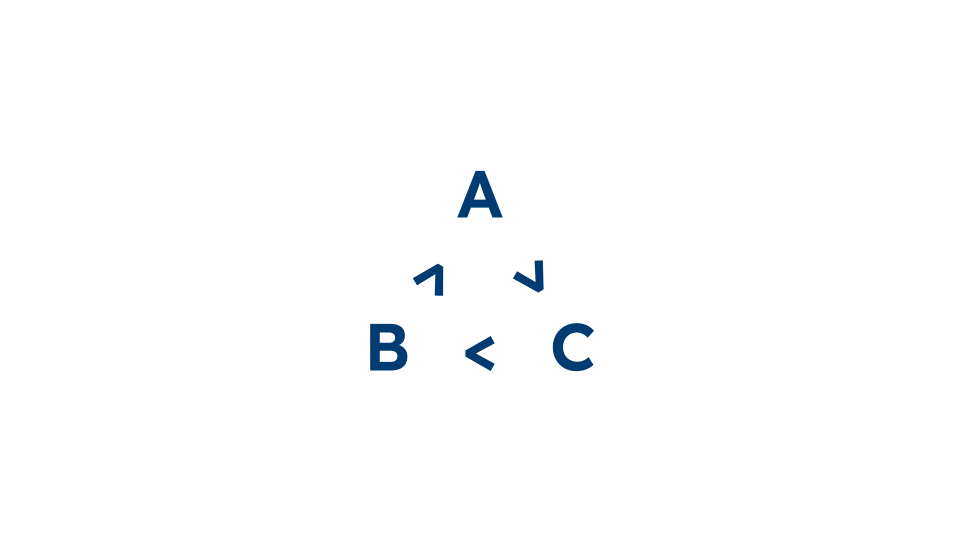

For fun, let's prove this using a simulation.

# Simulation

In [12]:
import math
import secrets

A = [4, 4, 4, 4, 4, 1]
B = [5, 5, 5, 2, 2, 2]
C = [6, 3, 3, 3, 3, 3]
dice = [A, B, C]
dice_labels = ["A", "B", "C"]

number_of_trials = 1000000
player1_score = 0
player2_score = 0

for p1_dice in range(len(dice)):
    for p2_dice in range(len(dice)):

        if p1_dice != p2_dice:
            for trial in range(number_of_trials):

                p1_roll = secrets.choice(dice[p1_dice])
                p2_roll = secrets.choice(dice[p2_dice])

                if p1_roll > p2_roll: player1_score += 1
                else: player2_score += 1

            print("Player 1 won " + str(player1_score * 100 / number_of_trials) + "% of the time with Dice " + dice_labels[p1_dice] + " compared to Player 2 with Dice " + dice_labels[p2_dice])
            print()

            player1_score = 0
            player2_score = 0

Player 1 won 41.6703% of the time with Dice A compared to Player 2 with Dice B

Player 1 won 69.4768% of the time with Dice A compared to Player 2 with Dice C

Player 1 won 58.3231% of the time with Dice B compared to Player 2 with Dice A

Player 1 won 41.733% of the time with Dice B compared to Player 2 with Dice C

Player 1 won 30.5055% of the time with Dice C compared to Player 2 with Dice A

Player 1 won 58.2564% of the time with Dice C compared to Player 2 with Dice B



We can see these win rates roughly match up with our probabilities from before. This is an effect of large sample sizes with proper sampling and the **Law of Large Numbers** Nice!

# Takeaway

We've proven the 3-dice game isn't transitive, meaning being Player 2 gives you an advantage. Although you have less options to choose from when picking your die, you do have the information on what Player 1 picked, so you can choose the die which is more likely to allow you to win.

Interview Answer: **Be Player 2, and pick the dice which beats out Player 1's choice!**

# One Step Further

Now, what would happen if the game was calculated over the sum of 2 rolls, rather than just the result of 1? What other scenarios would you have to consider? Would this change your previous answer, and if so, how?

I'll leave that for you to figure out! Should you choose to explore this problem, feel free to fork this repository and add on with your own solution!